In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("state_data.csv")
print (np.shape(df))

print("First five: \n ", df.head(5))
print("Last five: \n", df.tail(5))

print("State: Symbol of the American state \n Latitude: Latitude of the state \n Longitude of the state \n Name: Name of the state")
print ("First state: Alaska")
print ("Last state: West Virginia")
print("Number of entries: 52")
counts_per_state = df["name"].value_counts()
#print (counts_per_state)
print("More than 50 states as it includes territories like Washington DC and Puerto Rico")

(52, 4)
First five: 
    state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
Last five: 
    state   latitude   longitude           name
47    VT  44.558803  -72.577841        Vermont
48    WA  47.751074 -120.740139     Washington
49    WI  43.784440  -88.787868      Wisconsin
50    WV  38.597626  -80.454903  West Virginia
51    WY  43.075968 -107.290284        Wyoming
State: Symbol of the American state 
 Latitude: Latitude of the state 
 Longitude of the state 
 Name: Name of the state
First state: Alaska
Last state: West Virginia
Number of entries: 52
More than 50 states as it includes territories like Washington DC and Puerto Rico


In [3]:
median_longitude = np.median(df["longitude"])
print ("Median Longitude : ", median_longitude)
median_latitude = np.median(df["latitude"])
print ("Median Latitude:" , median_latitude)

Median Longitude :  -89.093198
Median Latitude: 39.4355155


In [4]:
df["Absolute distance to median latitude"] = abs(df["latitude"] - median_latitude)

df["Absolute distance to median longitude"] = abs(df["longitude"] - median_longitude)

print (np.shape(df))
#52 rows, 6 columns


(52, 6)


In [5]:
closest_lat = df.loc[df["Absolute distance to median latitude"].idxmin()]
farthest_lat = df.loc[df["Absolute distance to median latitude"].idxmax()]


closest_long =df.loc[df["Absolute distance to median longitude"].idxmin()]
farthest_long = df.loc[df["Absolute distance to median longitude"].idxmax()]

print(f"State closest to median latitude: {closest_lat['name']} ({closest_lat['Absolute distance to median latitude']:.2f}° away)")
print(f"State farthest from median latitude: {farthest_lat['name']} ({farthest_lat['Absolute distance to median latitude']:.2f}° away)")

print(f"State closest to median longitude: {closest_long['name']} ({closest_long['Absolute distance to median longitude']:.2f}° away)")
print(f"State farthest from median longitude: {farthest_long['name']} ({farthest_long['Absolute distance to median longitude']:.2f}° away)")

State closest to median latitude: Colorado (0.11° away)
State farthest from median latitude: Alaska (24.15° away)
State closest to median longitude: Illinois (0.31° away)
State farthest from median longitude: Hawaii (66.57° away)


In [6]:
random_data = df.sample(n=5, random_state=1)
print(random_data)

#I found the function sample() under the API Reference/General fucntions/dataframe webapage. 
#It returns a random sample of rows from the dataframe
#it is helpful for testing and visuallising data.
#It is also also used to inspect some rows from a large dataframe.


   state   latitude   longitude           name  \
31    NJ  40.058324  -74.405661     New Jersey   
2     AR  35.201050  -91.831833       Arkansas   
42    SD  43.969515  -99.901813   South Dakota   
32    NM  34.972730 -105.032363     New Mexico   
30    NH  43.193852  -71.572395  New Hampshire   

    Absolute distance to median latitude  \
31                              0.622808   
2                               4.234465   
42                              4.534000   
32                              4.462786   
30                              3.758336   

    Absolute distance to median longitude  
31                              14.687537  
2                                2.738635  
42                              10.808615  
32                              15.939165  
30                              17.520803  


# seaborn

In [7]:
import seaborn as sns

In [8]:
flights = sns.load_dataset("flights")
flights = flights.dropna()

In [9]:
print ("Shape of the dataset: ", np.shape(flights))
print ("144 rows, 6 columns")
print ("First 5 rows: \n", flights.head(5))
print ("Last 5 rows: \n", flights.tail(5))

print ("Year - year of the data")
print ("month - month of the data")
print("passengers - number of passengers")

Shape of the dataset:  (144, 3)
144 rows, 6 columns
First 5 rows: 
    year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
Last 5 rows: 
      year month  passengers
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
Year - year of the data
month - month of the data
passengers - number of passengers


C:\Users\19yas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\19yas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


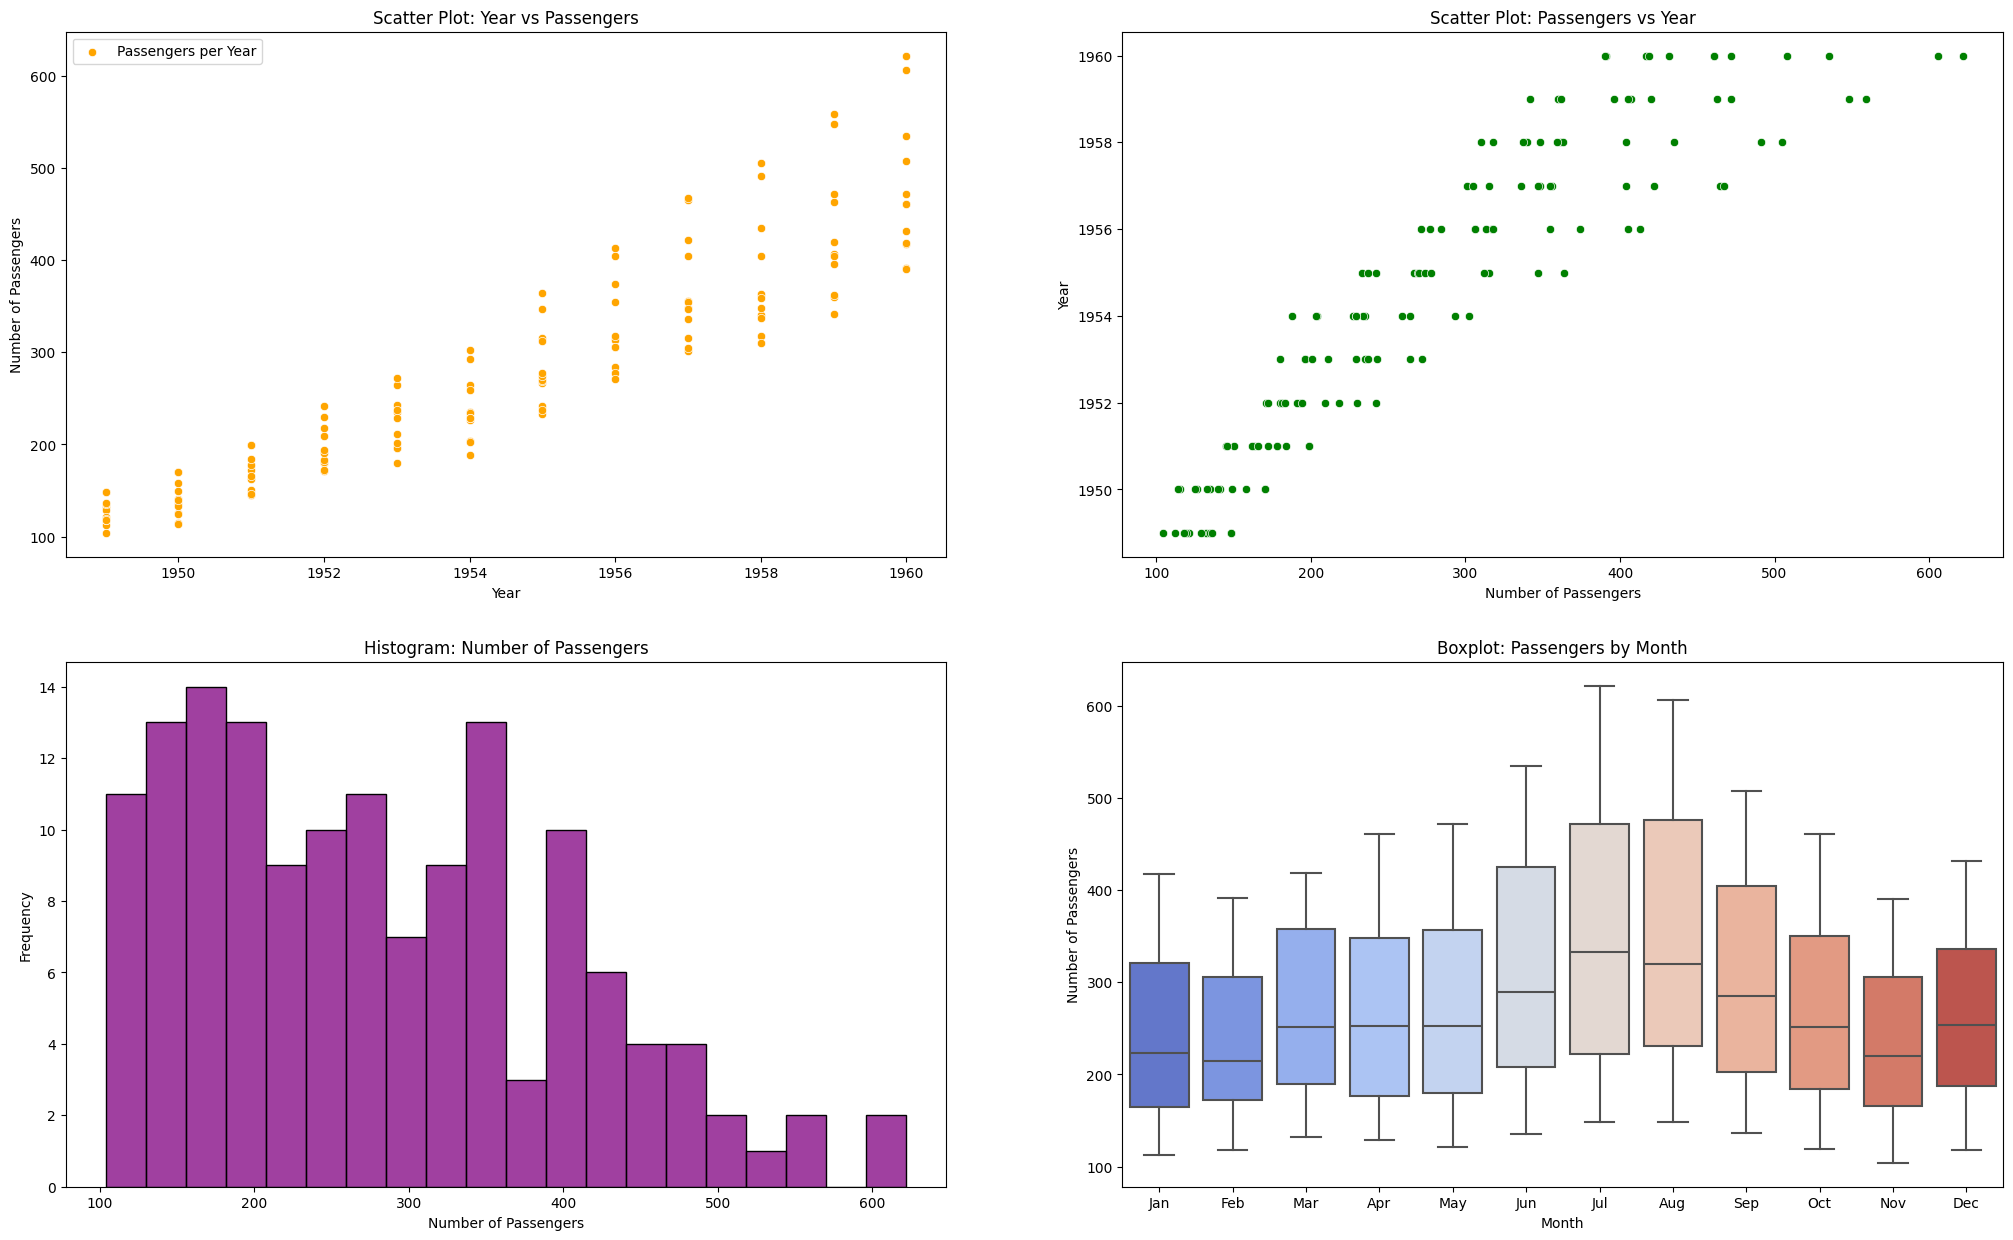

In [13]:
fig, axes = plt.subplots (2, 2, figsize = (25,15))

#top left
sns.scatterplot(data = flights, x = "year", y= "passengers", ax = axes[0,0], color="orange", label="Passengers per Year")
axes[0,0].set_title("Scatter Plot: Year vs Passengers")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Number of Passengers")
axes[0, 0].legend()

#top right
sns.scatterplot(data = flights, x = "passengers", y = "year",  ax = axes[0,1] , color="green")
axes[0,1].set_title("Scatter Plot: Passengers vs Year")
axes[0, 1].set_xlabel("Number of Passengers")
axes[0, 1].set_ylabel("Year")

#bottom left
sns.histplot(data = flights, x = "passengers", bins = 20 ,ax = axes [1,0] , color="purple")
axes[1,0].set_title("Histogram: Number of Passengers")
axes[1, 0].set_xlabel("Number of Passengers")
axes[1, 0].set_ylabel("Frequency")

#bottom right
sns.boxplot(data=flights, x="month", y="passengers", ax=axes[1, 1] , palette="coolwarm") 
axes[1, 1].set_title("Boxplot: Passengers by Month")
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Number of Passengers")

plt.show()
